## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
source_data = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
source_data.head()
source_data.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [6]:
# Checking the number of mice.
source_data["Mouse ID"].value_counts()
source_data["Mouse ID"].nunique()

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_check = source_data.groupby(["Mouse ID","Timepoint"]).count()
bad_mice = mice_check.loc[mice_check["Metastatic Sites"]>1,:]
bad_mice

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse_data = source_data.loc[source_data["Mouse ID"]=="g989",:]
bad_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_data = source_data.drop([row for row in source_data if (["Mouse ID"] == "g989")],axis=0,inplace=True)
clean_data = source_data.loc[source_data["Mouse ID"] != "g989",:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tv_mean = (clean_data.groupby("Drug Regimen").mean())["Tumor Volume (mm3)"]
tv_median = (clean_data.groupby("Drug Regimen").median())["Tumor Volume (mm3)"]
tv_std = (clean_data.groupby("Drug Regimen").std())["Tumor Volume (mm3)"]
tv_sem = (clean_data.groupby("Drug Regimen").sem())["Tumor Volume (mm3)"]

tv_agg = pd.DataFrame({"TV Mean":tv_mean,"TV Median":tv_median,"TV STDev":tv_std,"TV SEM":tv_sem})
tv_agg


,TV Mean,TV Median,TV STDev,TV SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tv_agg2 = clean_data.groupby("Drug Regimen").agg(TVMean=("Tumor Volume (mm3)",np.mean),TVVariance=("Tumor Volume (mm3)",np.median),TVSTDev=("Tumor Volume (mm3)",np.std),TVSEM=("Tumor Volume (mm3)",st.sem))
tv_agg2

,TVMean,TVVariance,TVSTDev,TVSEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

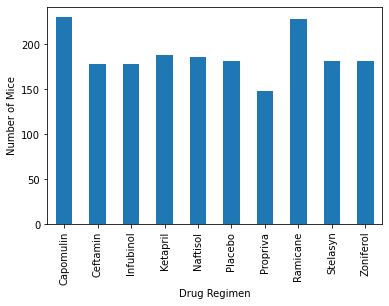

In [91]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_count = clean_data.groupby("Drug Regimen").count()

drug_count["Mouse ID"].plot(kind="bar")

plt.ylabel("Number of Mice")
plt.show()

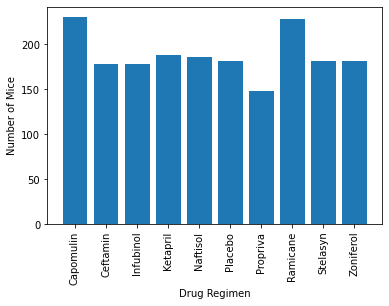

In [92]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_count = clean_data.groupby("Drug Regimen").count()

x_axis = drug_count.index
y_axis = drug_count["Mouse ID"]
plt.bar(x_axis,y_axis)

plt.xticks(rotation='vertical')
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()


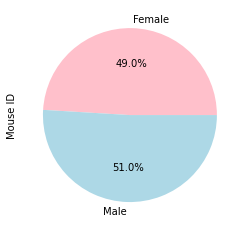

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = (clean_data.groupby("Sex").count())["Mouse ID"]

labels = mice_gender.index
colors = ["pink","lightblue"]
mice_gender.plot(kind="pie",labels=labels,colors=colors,autopct="%1.1f%%")
plt.show()

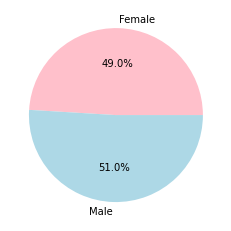

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = (clean_data.groupby("Sex").count())["Mouse ID"]

labels = mice_gender.index
colors = ["pink","lightblue"]
plt.pie(mice_gender,labels=labels,colors=colors,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = (clean_data.groupby("Mouse ID").max())["Timepoint"]
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_timepoint = pd.merge(last_timepoint,clean_data,how="left",on=["Mouse ID","Timepoint"])
tumor_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [229]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tv_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_timepoint.loc[tumor_timepoint["Drug Regimen"]==drug]
    tv_data.append(tumor_timepoint.loc[tumor_timepoint["Drug Regimen"]==drug]) 

tv_data

    # add subset 
tv_clean = tumor_timepoint[(tumor_timepoint["Drug Regimen"]=="Capomulin")|(tumor_timepoint["Drug Regimen"]=="Ramicane")|(tumor_timepoint["Drug Regimen"]=="Infubinol")|(tumor_timepoint["Drug Regimen"]=="Ceftamin")]
tv_clean
    
    # Determine outliers using upper and lower bounds
quartiles = tv_clean["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = tv_clean.loc[(tv_clean["Tumor Volume (mm3)"] < lower_bound) | (tv_clean["Tumor Volume (mm3)"] > upper_bound)]
outlier_occupancy
    

The lower quartile of occupancy is: 37.187743802499995
The upper quartile of occupancy is: 59.930261755000004
The interquartile range of occupancy is: 22.74251795250001
The the median of occupancy is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
